Length of data: 39


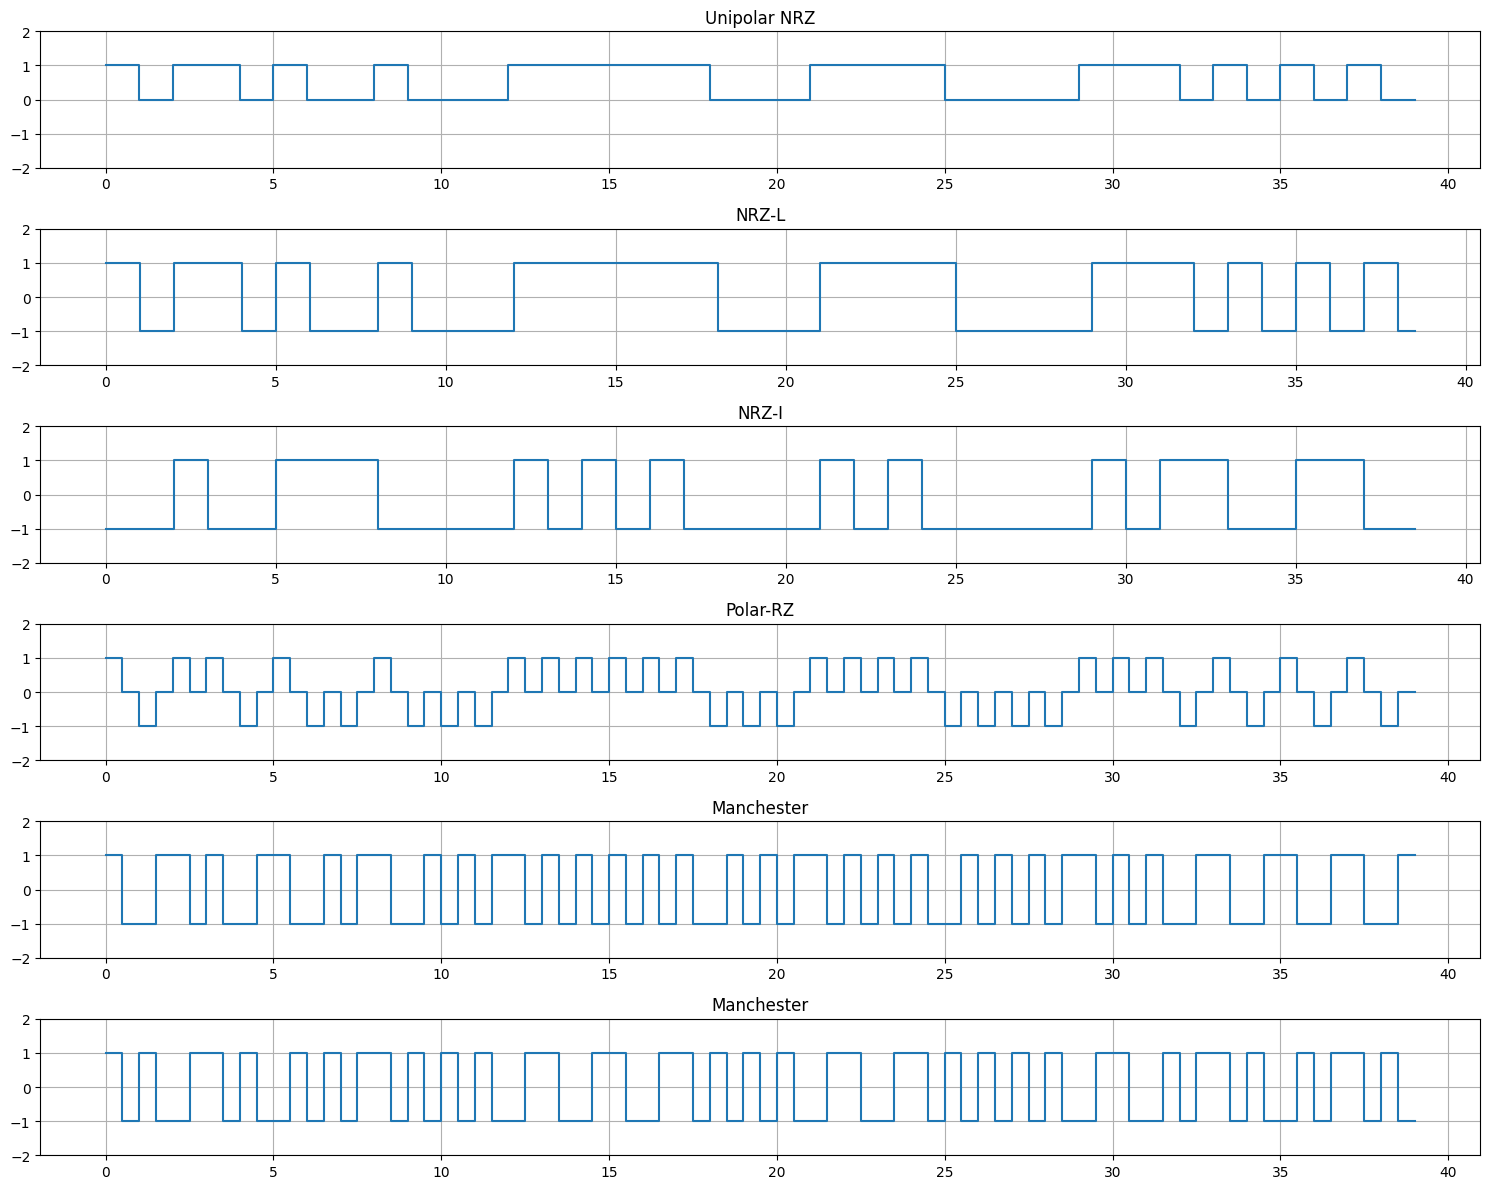

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def unipolar_NRZ(data_set, amplitude, time_per_bit):
    time = []
    signal = []
    current_time = 0
    for bit in data_set:
        if bit == 1:
            signal.extend([amplitude, amplitude])
        else:
            signal.extend([0, 0])
        time.extend([current_time, current_time + time_per_bit])
        current_time += time_per_bit
    return time, signal



def nrz_l_encode(binary_data):
    encoded_signal = []
    for bit in binary_data:
        if bit == 1:
            encoded_signal.extend([1, 1])   # 1 → +V
        else:
            encoded_signal.extend([-1, -1]) # 0 → -V
    time = np.arange(0, len(binary_data) * 2) * 0.5
    return time, encoded_signal

def nrz_I_encode(binary_data, initial_state=1):
    encoded_signal = []
    current_state = initial_state
    for bit in binary_data:
        if bit == 1:  
            current_state *= -1  # toggle state on 1
        encoded_signal.extend([current_state, current_state])  
    time = np.arange(0, len(binary_data) * 2) * 0.5
    return time, encoded_signal
def polar_RZ(binary_sequence):
    time_points = []
    signal_values = []
    time = 0

    for bit in binary_sequence:
        if bit == 1:
            signal_values.extend([1, 1, 0, 0])
        elif bit == 0:
            signal_values.extend([-1, -1, 0, 0])
        time_points.extend([time, time + 0.5, time + 0.5, time + 1])
        time += 1  
    return time_points, signal_values


    return time, signal
def manchester(binary_data):
    time, signal = [], []
    t = 0
    for bit in binary_data:
        if bit == 1:
            signal.extend([1, 1, -1, -1])
        else:
            signal.extend([-1, -1, 1, 1])

        time.extend([t, t+0.5, t+0.5, t+1])
        t += 1
    return time, signal

def differential_manchester(binary_data, initial_level=1):
    time, signal = [], []
    t = 0
    current_level = initial_level  
    for bit in binary_data:
        if bit == 0:
            current_level *= -1  
        signal.extend([current_level, current_level])
        time.extend([t, t+0.5])
        current_level *= -1  

        signal.extend([current_level, current_level])
        time.extend([t+0.5, t+1])

        t += 1
    return time, signal
   
# Test data
data = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 0, 1, 0]

print("Length of data:", len(data))

# Plot
plt.figure(figsize=(15,12))

# Unipolar NRZ
time, signal = unipolar_NRZ(data, 1, 1)
plt.subplot(6,1,1)
plt.title("Unipolar NRZ")
plt.plot(time, signal, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)

# NRZ-L
time_nrzl, signal_nrzl = nrz_l_encode(data)
plt.subplot(6,1,2)
plt.title("NRZ-L")
plt.plot(time_nrzl, signal_nrzl, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)

# NRZ-I
time_nrzI, signal_nrzI = nrz_I_encode(data, 1)
plt.subplot(6,1,3)
plt.title("NRZ-I")
plt.plot(time_nrzI, signal_nrzI, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)

time_rz, signal_rz = polar_RZ(data)
plt.subplot(6,1,4)
plt.title("Polar-RZ")
plt.plot(time_rz, signal_rz, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)

time_man, signal_man = manchester(data)
plt.subplot(6,1,5)
plt.title("Manchester")
plt.plot(time_man, signal_man, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)

time_mandiff, signal_mandiff = differential_manchester(data,1)
plt.subplot(6,1,6)
plt.title("Manchester")
plt.plot(time_mandiff, signal_mandiff, drawstyle='steps-post')
plt.ylim(-2, 2)
plt.grid(True)
plt.tight_layout()
plt.show()